In [26]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#Handling Of Missing Values

In [27]:
df.isnull().sum()
df.dropna()
#there were no missing values even though if they were i just dropped them all

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#Encoding Categorical Data

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['target'] = le.fit_transform(df['target'])


There was no need of applying label encoding, ordinal encoding or one shot encoding here as the dataset was already in an numerical format of i have placed it for visualization purposes and for solving of the task purposes

In [29]:
print(df.head)

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

#Scaling Of Data

In [30]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['age', 'chol', 'trestbps','thalach','oldpeak']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [31]:
print(df.head())

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0 -0.268437    1   0 -0.377636 -0.659332    0        1  0.821321      0   
1 -0.158157    1   0  0.479107 -0.833861    1        0  0.255968      1   
2  1.716595    1   0  0.764688 -1.396233    0        1 -1.048692      1   
3  0.724079    1   0  0.936037 -0.833861    0        1  0.516900      0   
4  0.834359    0   0  0.364875  0.930822    1        1 -1.874977      0   

    oldpeak  slope  ca  thal  target  
0 -0.060888      2   2     3       0  
1  1.727137      0   0     3       0  
2  1.301417      0   0     3       0  
3 -0.912329      2   1     3       0  
4  0.705408      1   3     2       0  


#Exploratory Data Analysis

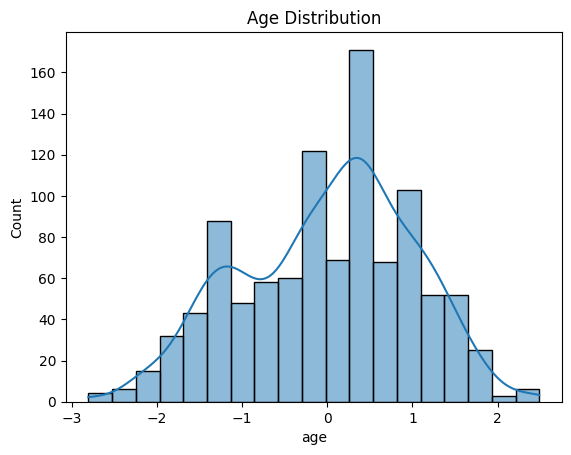

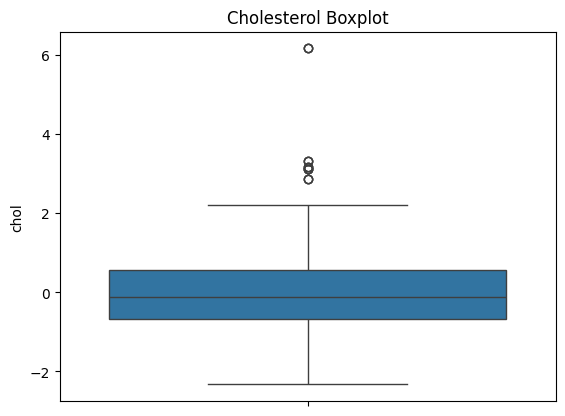

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Age
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot for Cholesterol
sns.boxplot(df['chol'])
plt.title('Cholesterol Boxplot')
plt.show()


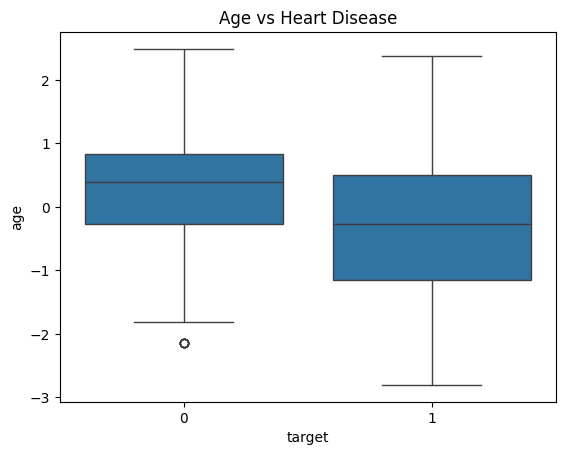

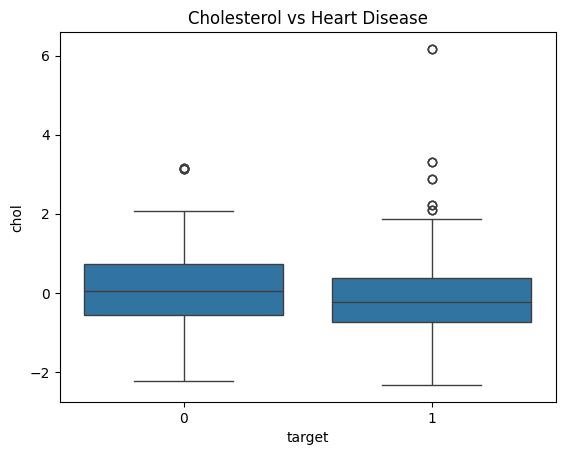

In [33]:
# Age vs Target
sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs Heart Disease')
plt.show()

# Cholesterol vs Target
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol vs Heart Disease')
plt.show()


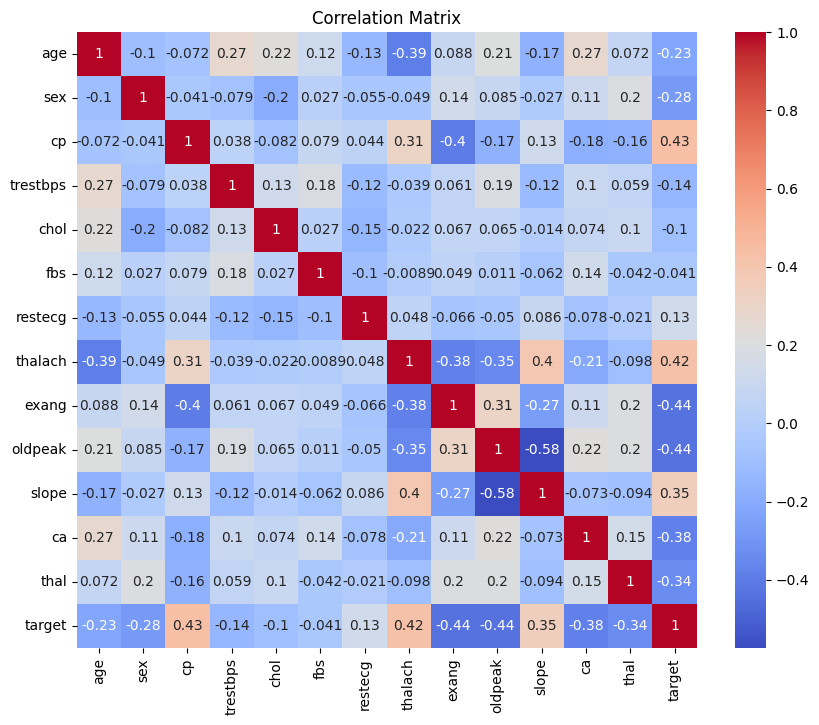

In [34]:
# Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


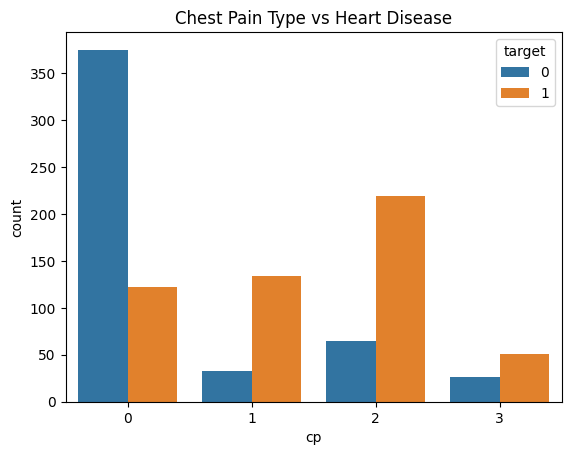

In [35]:
# Chest Pain Type
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Heart Disease')
plt.show()


#Feature Engineering & Selection

In [36]:
df['age_group'] = pd.cut(df['age'], bins=[0, 40, 60, 100], labels=[0, 1, 2])
#REPLACING MISSING VALUES FORM AGE_GROUP
df['age_group'] = df['age_group'].fillna(1).astype(int)
df['chol_age_ratio'] = df['chol'] / (df['age'] + 1)
df['risk_score'] = df['cp'] + df['exang'] + df['oldpeak']

print(df.head())

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0 -0.268437    1   0 -0.377636 -0.659332    0        1  0.821321      0   
1 -0.158157    1   0  0.479107 -0.833861    1        0  0.255968      1   
2  1.716595    1   0  0.764688 -1.396233    0        1 -1.048692      1   
3  0.724079    1   0  0.936037 -0.833861    0        1  0.516900      0   
4  0.834359    0   0  0.364875  0.930822    1        1 -1.874977      0   

    oldpeak  slope  ca  thal  target  age_group  chol_age_ratio  risk_score  
0 -0.060888      2   2     3       0          1       -0.901264   -0.060888  
1  1.727137      0   0     3       0          1       -0.990519    2.727137  
2  1.301417      0   0     3       0          0       -0.513964    2.301417  
3 -0.912329      2   1     3       0          0       -0.483656   -0.912329  
4  0.705408      1   3     2       0          0        0.507437    0.705408  


<Axes: >

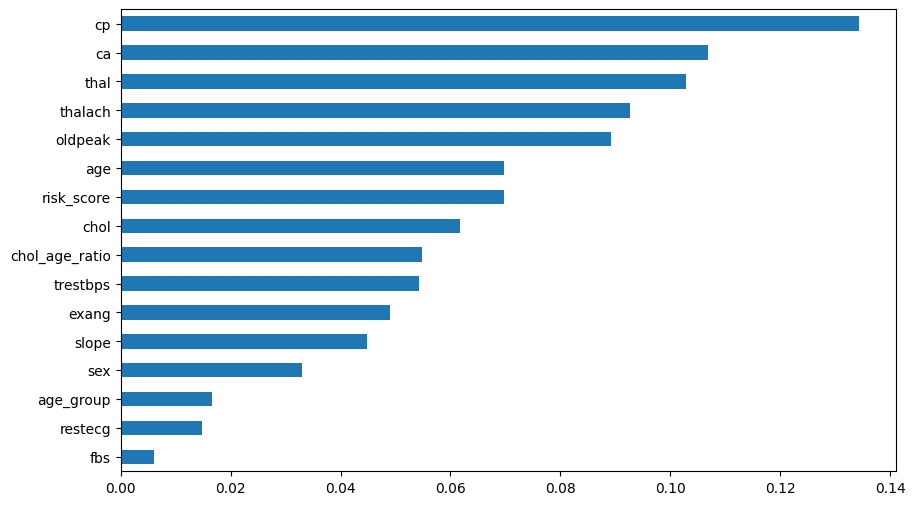

In [37]:
#using rnadom forest to rank features on the basis of importance
from sklearn.ensemble import RandomForestClassifier

X = df.drop('target', axis=1)
y = df['target']

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6))


#Model Training

In [38]:
X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

#Evaluation Of The Models

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)

    # For ROC AUC, we need probabilities
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = y_pred  # fallback if predict_proba isn't available

    print(f"\n📊 {name} Evaluation:")
    print("Accuracy:       ", accuracy_score(y_test, y_pred))
    print("Precision:      ", precision_score(y_test, y_pred))
    print("Recall:         ", recall_score(y_test, y_pred))
    print("F1 Score:       ", f1_score(y_test, y_pred))
    print("ROC AUC Score:  ", roc_auc_score(y_test, y_proba))



📊 Logistic Regression Evaluation:
Accuracy:        0.8146341463414634
Precision:       0.782608695652174
Recall:          0.8737864077669902
F1 Score:        0.8256880733944955
ROC AUC Score:   0.8859699219493622

📊 Decision Tree Evaluation:
Accuracy:        0.9853658536585366
Precision:       1.0
Recall:          0.970873786407767
F1 Score:        0.9852216748768473
ROC AUC Score:   0.9854368932038835

📊 Random Forest Evaluation:
Accuracy:        0.9853658536585366
Precision:       1.0
Recall:          0.970873786407767
F1 Score:        0.9852216748768473
ROC AUC Score:   0.9994288977727014


This model can be used to check on important risk factors highlighting that that which are the most important causes that can lead to an heart disease and the scaling done to keep in check which factors are more important in calculation like age, cholestrol level, chest pain this model will guide the doctors to look direclty in the direction of the problem and not waste time looking at irrelevant factors

#Tuning hyperparameters using GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Decision Tree
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

# Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

# Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Logistic Regression:", grid_lr.best_params_, "Score:", grid_lr.best_score_)
print("Best Decision Tree:", grid_dt.best_params_, "Score:", grid_dt.best_score_)
print("Best Random Forest:", grid_rf.best_params_, "Score:", grid_rf.best_score_)

Best Logistic Regression: {'C': 0.1, 'solver': 'liblinear'} Score: 0.8609756097560975
Best Decision Tree: {'max_depth': 10, 'min_samples_split': 2} Score: 0.9731707317073169
Best Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50} Score: 0.9853658536585366


In [43]:
import joblib

joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(dt, 'decision_tree_model.pkl')
joblib.dump(lr, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [44]:
print(df.columns.tolist())


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_group', 'chol_age_ratio', 'risk_score']
